# Matplotlib Basics

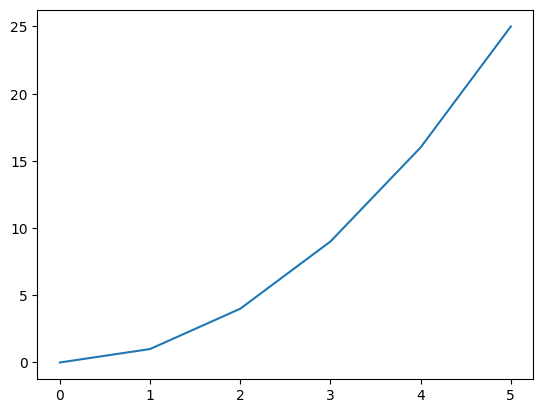

In [2]:
import matplotlib.pyplot as plt

plt.plot([0, 1, 4, 9, 16, 25])

<BarContainer object of 6 artists>

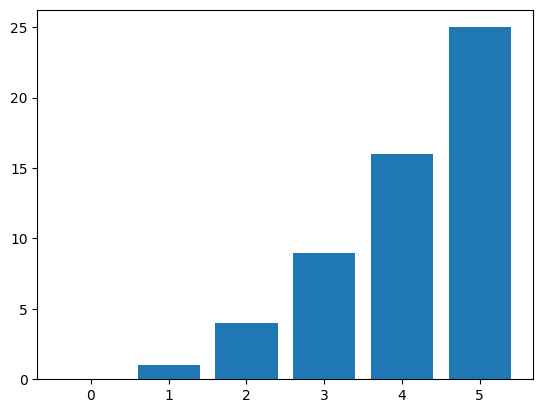

In [3]:
plt.bar(
    x=[0, 1, 2, 3, 4, 5],
    height=[0, 1, 4, 9, 16, 25]
)

In [4]:
x = list(range(10))
y = [x**2 for x in x]
z = [x**3 for x in x]

y

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

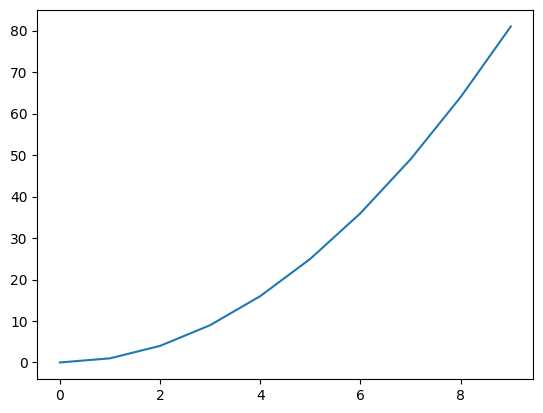

In [5]:
import matplotlib.pyplot as plt

plt.plot(y)

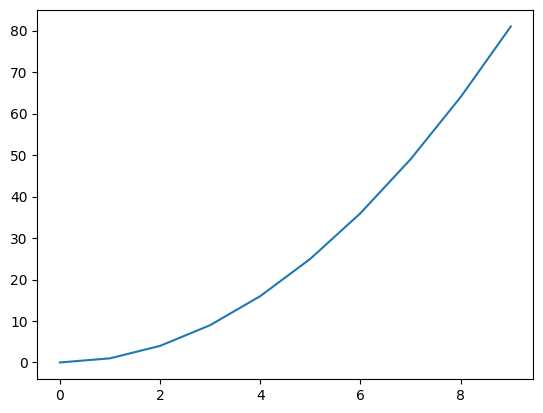

In [7]:
import pandas as pd

plt.plot(pd.Series(y))

In [8]:
df = pd.DataFrame(
    {
        'x': x,
        'y': y,
        'z': z
    }
)

In [9]:
df.head(3)

,x,y,z
0,0,0,0
1,1,1,1
2,2,4,8


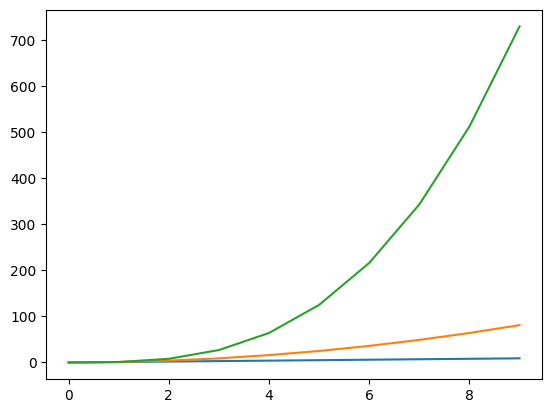

In [10]:
plt.plot(df)

# Formatted (Line) Charts

In [12]:
# Data Prep
housing_raw = pd.read_csv("../../Data/housing_data.csv", parse_dates=["period_begin", "period_end"])

ca_housing = (
    housing_raw
    .loc[housing_raw["region_name"].str.contains("CA")]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
)

ca_housing_markets = (
    ca_housing
    .set_index("period_begin")
    .loc[:, ["region_name", "median_active_list_price"]]
    .sort_index()
    .pivot_table(
        index="period_begin",
        columns="region_name",
        values="median_active_list_price"
    )
   .resample("Q")
   .mean()
)

C:\Users\mathe\AppData\Local\Temp\ipykernel_7612\1793607197.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ca_housing


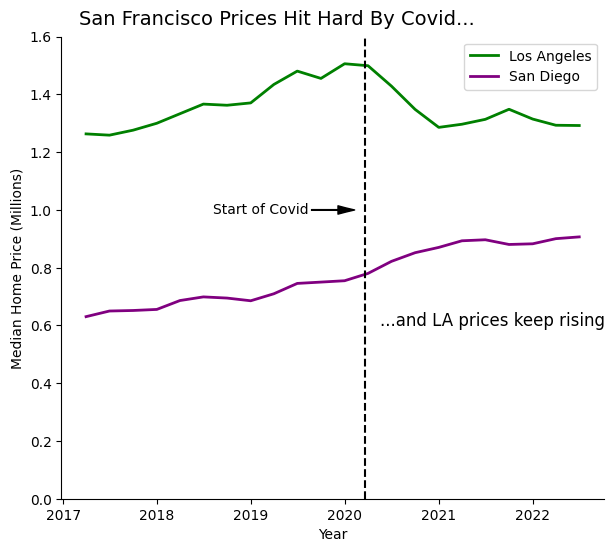

In [13]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets["San Francisco"]/1000000,
    color="green",
    linewidth=2
)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets["Los Angeles"]/1000000,
    color="purple",
    linewidth=2
)

fig.text(.15, .9, 
         "San Francisco Prices Hit Hard By Covid...",
         fontsize=14
        )

ax.text(18400, .6, 
         "...and LA prices keep rising",
         fontsize=12
)

ax.set_xlabel("Year")
ax.set_ylabel("Median Home Price (Millions)")

ax.legend(ca_housing_markets.columns)
ax.set_ylim(0, 1.6)
#ax.set_xlim()

ax.axvline(18341, c="black", ls="--")
ax.annotate("Start of Covid",
            xy=(18300, 1),
            xytext=(17750, 1),
            arrowprops=dict(
                facecolor="black", 
                width=.5, 
                headwidth=6,
                connectionstyle="angle3, angleA=290, angleB=0"
            ),
            verticalalignment="center"
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Stacked Line Charts

In [14]:
inventory = (
    ca_housing
    .loc[:, ["period_begin", "region_name", "inventory"]]
    .pivot_table(
        index="period_begin",
        columns="region_name",
        values="inventory"
    )
)

inventory.head(3)

region_name,Los Angeles,San Diego,San Francisco
period_begin,,,
2017-01-02,15492.0,5468.0,626.0
2017-01-09,15605.0,5493.0,652.0
2017-01-16,15724.0,5520.0,673.0


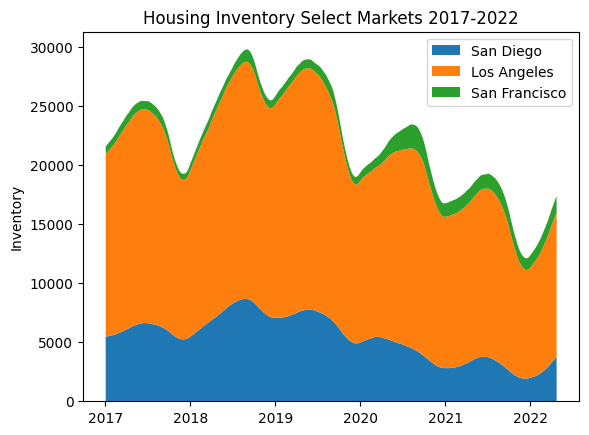

In [15]:
fig, ax = plt.subplots()

ax.stackplot(
    inventory.index, 
    inventory["San Diego"], 
    inventory["Los Angeles"], 
    inventory["San Francisco"]
)

ax.set_title("Housing Inventory Select Markets 2017-2022")
ax.set_ylabel("Inventory")
ax.legend(["San Diego", "Los Angeles", "San Francisco"])

# Dual Axis Line Charts

In [16]:
ca_housing_markets.iloc[2:15]

region_name,Los Angeles,San Diego,San Francisco
period_begin,,,
2017-09-30,651898.046154,646278.800000,1.276378e+06
2017-12-31,655576.253846,645082.330769,1.300292e+06
2018-03-31,686359.753846,660419.723077,1.333339e+06
2018-06-30,698958.292308,672296.692308,1.366697e+06
2018-09-30,694916.646154,651794.069231,1.362654e+06
2018-12-31,685525.214286,649885.678571,1.370784e+06
2019-03-31,709833.691667,673348.075000,1.434700e+06
2019-06-30,745658.046154,689834.561538,1.480940e+06
2019-09-30,750237.578571,687519.007143,1.455582e+06


In [17]:
sf_dual = (ca_housing
          .loc[ca_housing["region_name"] == "San Francisco", 
              ["period_begin", "inventory", "median_active_list_price"]]
          .set_index("period_begin")
          .sort_index()
    )

sf_dual.head(1)

,inventory,median_active_list_price
period_begin,,
2017-01-02,626.0,1229018.7


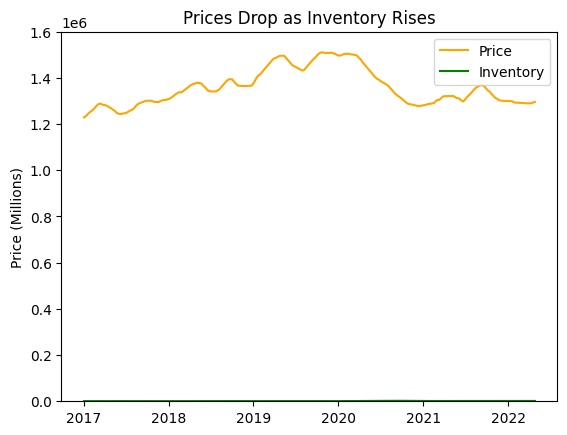

In [18]:
fig, ax = plt.subplots()

ax.plot(
    sf_dual.index, 
    sf_dual["median_active_list_price"], 
    label="Price",
    c="orange"
)

ax.plot(
    sf_dual.index, 
    sf_dual["inventory"], 
    label="Inventory",
    c="green"
)

ax.set_title("Prices Drop as Inventory Rises")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1600000)
ax.legend()

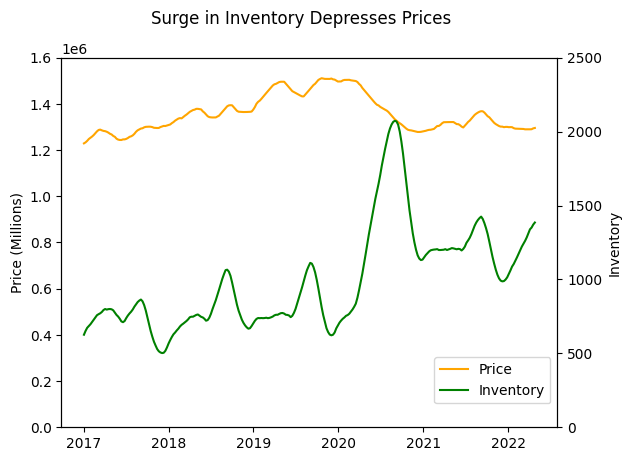

In [19]:
fig, ax = plt.subplots()

fig.suptitle("Surge in Inventory Depresses Prices")

ax.plot(sf_dual.index, 
        sf_dual["median_active_list_price"], 
        label="Price",
        c="orange")

ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1600000)

ax2 = ax.twinx()

ax2.plot(sf_dual.index, 
         sf_dual["inventory"], 
         label="Inventory",
         c="green")

ax2.set_ylabel("Inventory")
ax2.set_ylim(0, 2500)

fig.legend(bbox_to_anchor=(.9, .27))

# Bar Charts

In [20]:
ca_housing_markets = (ca_housing
                     .set_index("period_begin")
                     .loc[:, ["region_name", "median_active_list_price"]]
                     .sort_index()
                     .pivot_table(index="period_begin",
                                  columns="region_name",
                                  values="median_active_list_price")
                     .resample("Q")
                     .mean()
                    )

C:\Users\mathe\AppData\Local\Temp\ipykernel_7612\3653044927.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ca_housing_markets = (ca_housing


In [21]:
mean_housing_price = ca_housing_markets.iloc[-1].mean()

In [22]:
prices = pd.DataFrame(ca_housing_markets.loc["2022-06-30", ["Los Angeles", "San Diego", "San Francisco"]])

prices.columns = ["Price"]

Text(0.5, 0, 'Price (Millions)')

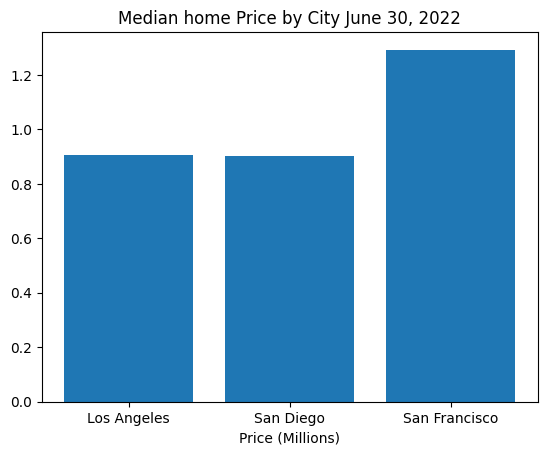

In [23]:
fig, ax = plt.subplots()

ax.bar(prices.index, prices["Price"] / 1000000)

ax.set_title("Median home Price by City June 30, 2022")
ax.set_xlabel("Price (Millions)")

In [24]:
mean_housing_price = round(ca_housing_markets.iloc[-1].mean())

In [25]:
prices.round()

,Price
region_name,
Los Angeles,906774.0
San Diego,902425.0
San Francisco,1292479.0


In [26]:
mean_housing_price

1033893

Text(0, 0.5, 'Price (Millions)')

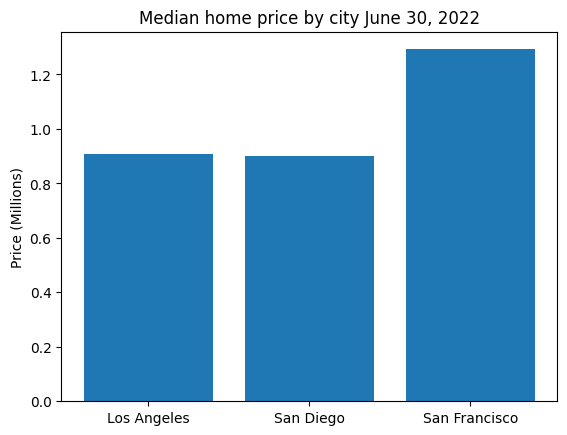

In [27]:
fig, ax = plt.subplots()

ax.bar(prices.index, prices["Price"] / 1000000)

ax.set_title("Median home price by city June 30, 2022")
ax.set_ylabel("Price (Millions)")

Text(0.5, 0, 'Price (Millions)')

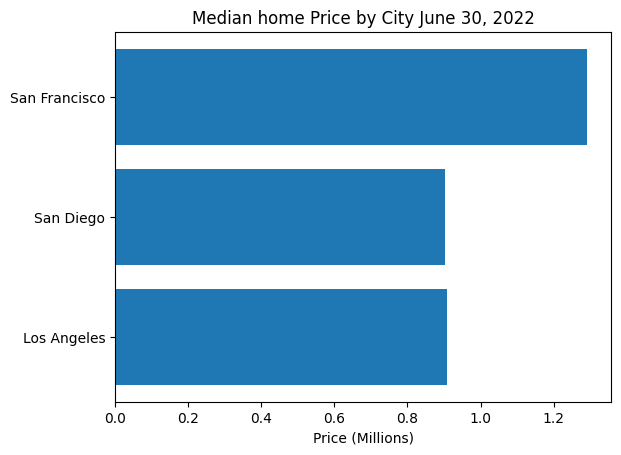

In [28]:
fig, ax = plt.subplots()

ax.barh(prices.index, prices["Price"] / 1000000)

ax.set_title("Median home Price by City June 30, 2022")
ax.set_xlabel("Price (Millions)")

# Adding Labels + Horizontal Line

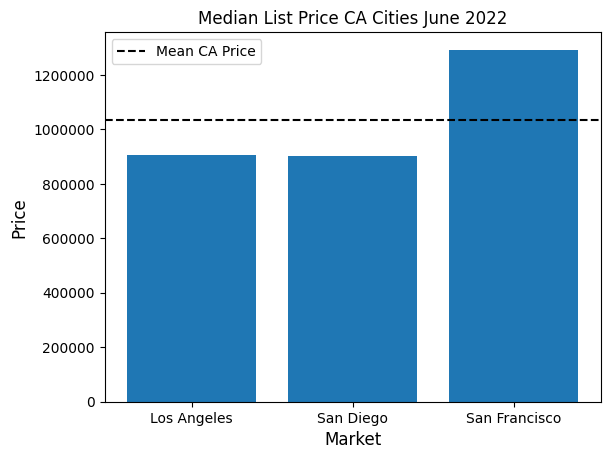

In [29]:
fig, ax = plt.subplots()

ax.ticklabel_format(style="plain")

ax.set_title("Median List Price CA Cities June 2022", fontsize=12)
ax.set_xlabel("Market", fontsize=12)
ax.set_ylabel("Price", fontsize=12)

ax.axhline(mean_housing_price, 0, 1, color="black", ls="--") 

ax.bar(prices.index, prices["Price"])

ax.legend(["Mean CA Price"], loc="upper left")

In [30]:
# Bar Colors

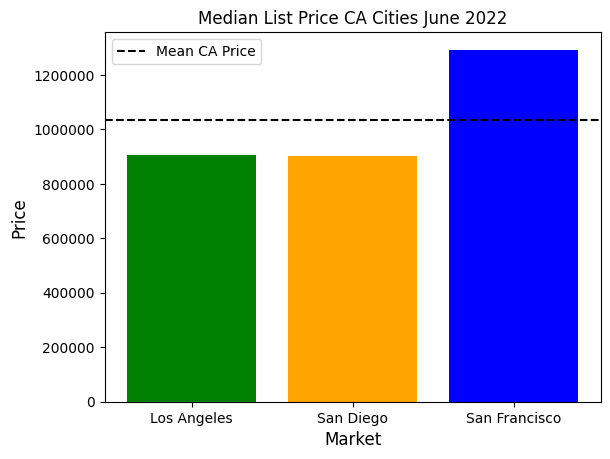

In [31]:
fig, ax = plt.subplots()

ax.ticklabel_format(style="plain")

ax.set_title("Median List Price CA Cities June 2022", fontsize=12)
ax.set_xlabel("Market", fontsize=12)
ax.set_ylabel("Price", fontsize=12)

ax.axhline(mean_housing_price, 0, 1, color="black", ls="--") 

colors = ["Green", "Orange", "Blue"]

ax.bar(prices.index, prices["Price"], color=colors)

ax.legend(["Mean CA Price"], loc="upper left")

# Add Data Labels

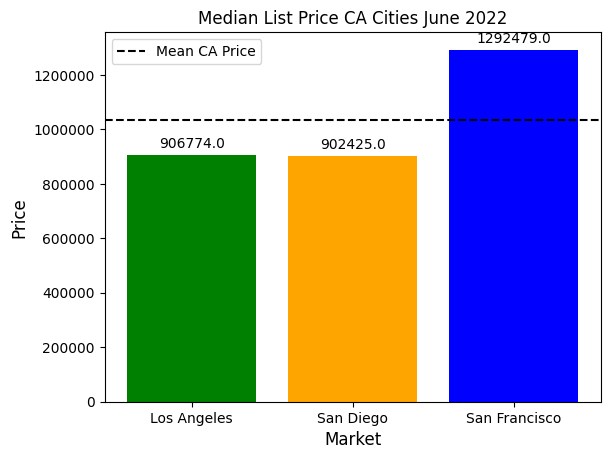

In [32]:
fig, ax = plt.subplots()

ax.ticklabel_format(style="plain")

ax.set_title("Median List Price CA Cities June 2022", fontsize=12)
ax.set_xlabel("Market", fontsize=12)
ax.set_ylabel("Price", fontsize=12)

ax.axhline(mean_housing_price, 0, 1, color="black", ls="--") 

colors = ["Green", "Orange", "Blue"]

heights = ax.bar(prices.index, prices["Price"], color=colors)

for h in heights:
   height = h.get_height()
   ax.annotate('{}'.format(height.round()),
      xy=(h.get_x() + h.get_width() / 2, height.round()),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

ax.legend(["Mean CA Price"], loc="upper left")

# Grouped Bar Plot - Note the Pandas API/Seaborn are much easier.

In [33]:
import numpy as np

In [34]:
ca_or = (housing_raw.loc[
    ((housing_raw["region_name"].str.contains("CA"))
    | (housing_raw["region_name"].str.contains("OR")))]
)

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
26,"Gilliam County, OR",2018-06-18,2018-09-09,3.0,9.0,9.0,95.6,143037.5,9.000000
164,"Nevada County, CA",2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
174,"Malheur County, OR",2020-12-14,2021-03-07,38.0,45.0,48.0,57.6,245637.4,19.921212
184,"Sherman County, OR",2020-04-06,2020-06-28,1.0,2.0,2.0,65.7,251375.0,2.000000


In [35]:
ca_or = ca_or.assign(state=np.where(ca_or["region_name"].str.contains("CA"), "CA", "OR"))

In [36]:
ca_or.loc[ca_or["region_name"]=="Multnomah County, OR"].iloc[107]

region_name                 Multnomah County, OR
period_begin                 2021-05-10 00:00:00
period_end                   2021-08-01 00:00:00
total_homes_sold                          3970.0
inventory                                 1481.0
active_listings                           1817.0
age_of_inventory                            26.4
median_active_list_price                519787.2
months_of_supply                        5.583484
state                                         OR
Name: 247082, dtype: object

In [37]:
ca_or["price_range"] = pd.cut(
    ca_or["median_active_list_price"],
    [0, 400000, 600000, 2000000],
    labels=["0-400k", "400k-600k","600k+"])

In [38]:
ca_or["price_range"].value_counts()

price_range
0-400k       12309
400k-600k     6292
600k+         6018
Name: count, dtype: int64

In [39]:
ca_or = (ca_or
         .query("period_end == '2021-08-01'")
         .pivot_table(
             index="price_range",
             columns="state",
             values="inventory",
             aggfunc="sum"
         )
        )

C:\Users\mathe\AppData\Local\Temp\ipykernel_7612\2067293447.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ca_or = (ca_or
C:\Users\mathe\AppData\Local\Temp\ipykernel_7612\2067293447.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ca_or = (ca_or


In [40]:
ca_or

state,CA,OR
price_range,,
0-400k,4267.0,1074.0
400k-600k,13877.0,4711.0
600k+,35147.0,1229.0


<Axes: xlabel='price_range'>

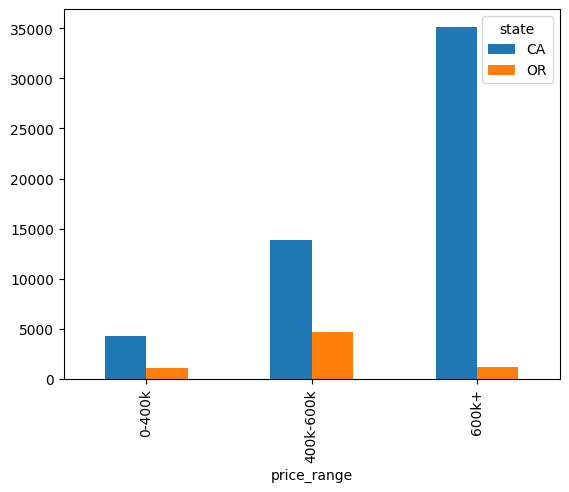

In [41]:
# Pandas Plot API


ca_or.plot.bar()

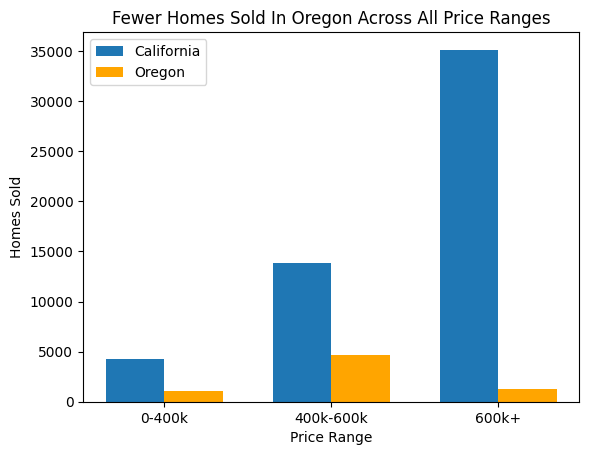

In [42]:
fig, ax = plt.subplots()

width=.35
x=np.arange(3)  # length of index

ax.bar(
    x-width/2, 
    ca_or["CA"], 
    width=width, 
    label="California"
)
ax.bar(
    x+width/2, 
    ca_or["OR"], 
    width=width, 
    label="Oregon", 
    color="orange"
)
ax.set_title("Fewer Homes Sold In Oregon Across All Price Ranges")
ax.set_xlabel("Price Range")
ax.set_ylabel("Homes Sold")
ax.set_xticks(x)
ax.set_xticklabels(ca_or.index)

ax.legend()

# Stacked Bar Charts

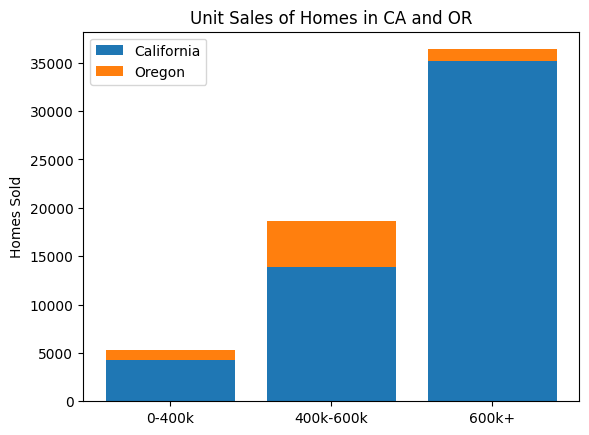

In [43]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index, 
    ca_or["CA"], 
    label="California"
)

ax.bar(
    ca_or.index, 
    ca_or["OR"], 
    label="Oregon", 
    bottom=ca_or["CA"]
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend()

In [44]:
# Code for how to add multiple stacks programatically
x = np.arange(0, len(df))

# Start the bottom at zero for the first set of bars.
bottom = np.zeros(len(df))

for i, col in enumerate(df.columns):
  ax.bar(df.index, df[col], bottom=bottom, label=col)
  bottom += np.array(df[col])

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")

Text(0.5, 4.444444444444445, 'Country')

In [45]:
ca_or = ca_or.apply(lambda x: x * 100 / sum(x), axis=1)

ca_or

state,CA,OR
price_range,,
0-400k,79.891406,20.108594
400k-600k,74.655692,25.344308
600k+,96.621399,3.378601


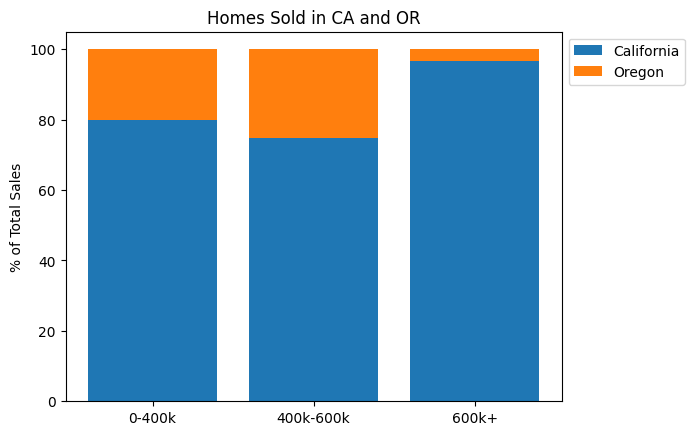

In [46]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index, 
    ca_or["CA"], 
    label="California"
)

ax.bar(
    ca_or.index, 
    ca_or["OR"], 
    label="Oregon", 
    bottom=ca_or["CA"]
)

ax.set_title("Homes Sold in CA and OR")
ax.set_ylabel("% of Total Sales")

ax.legend(bbox_to_anchor=(1,1))

# Combo Charts

In [47]:
sf_stats = sf_dual.resample("Y").mean()

C:\Users\mathe\AppData\Local\Temp\ipykernel_7612\4031653205.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sf_stats = sf_dual.resample("Y").mean()


In [48]:
sf_stats.round()

,inventory,median_active_list_price
period_begin,,
2017-12-31,717.0,1274813.0
2018-12-31,779.0,1358603.0
2019-12-31,806.0,1469807.0
2020-12-31,1375.0,1390725.0
2021-12-31,1209.0,1318632.0
2022-12-31,1218.0,1293193.0


Text(0, 0.5, 'Inventory')

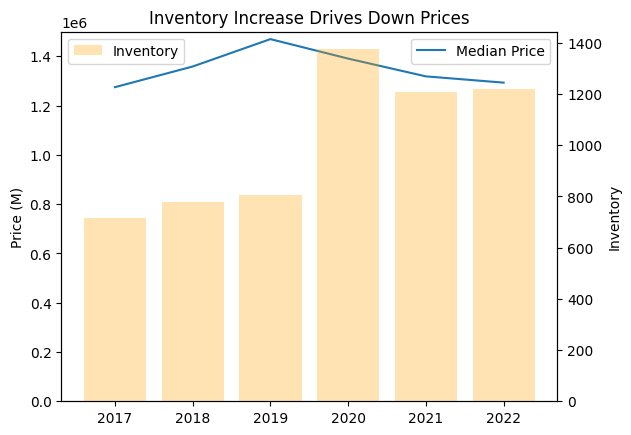

In [49]:
fig, ax = plt.subplots()

x = np.arange(2017, 2023)
ax.set_title("Inventory Increase Drives Down Prices")
ax.plot(x, 
        sf_stats["median_active_list_price"],
        label='Median Price'
       )

ax.set_ylim(0, 1500000)
ax.set_ylabel("Price (M)")
ax.legend(loc="upper right")

ax2 = ax.twinx()

ax2.bar(x, 
        sf_stats["inventory"],
        color="Orange",
        label="Inventory",
        alpha=.3
       )
ax2.legend(loc="upper left")
ax2.set_ylabel("Inventory")


# Pie & Donut Charts

In [50]:
sales_totals = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby("region_name")
    .agg({"total_homes_sold":"sum"})
    .iloc[::-1]
)

sales_totals

,total_homes_sold
region_name,
San Francisco,371776.0
San Diego,2373289.0
Los Angeles,4622703.0


Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

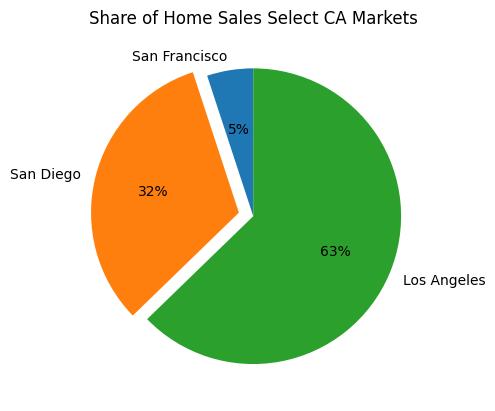

In [51]:
fig, ax = plt.subplots()

ax.pie(
    x=sales_totals["total_homes_sold"],
    startangle=90,
    labels=sales_totals.index, 
    autopct="%.0f%%",
    explode = (0, .1, 0)
)

ax.set_title("Share of Home Sales Select CA Markets")

Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

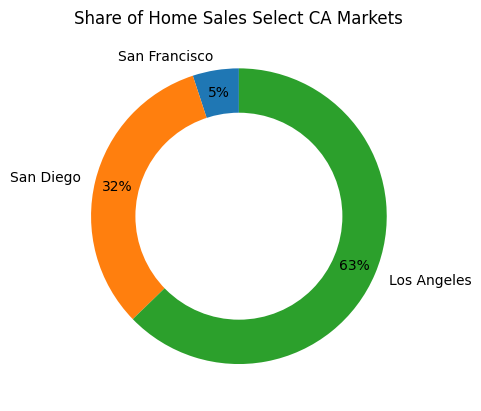

In [52]:
fig, ax = plt.subplots()

ax.pie(
    x=sales_totals["total_homes_sold"],
    startangle=90,
    labels=sales_totals.index, 
    autopct="%.0f%%",
    pctdistance=.85
)

donut_hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(donut_hole)

ax.set_title("Share of Home Sales Select CA Markets")

# Scatter and Bubble

In [53]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
889,Los Angeles,2018-08-20,2018-11-11,16015.0,20026.0,21675.0,51.9,694662.5,16.528985
3773,Los Angeles,2017-12-25,2018-03-18,13596.0,13817.0,15251.0,51.3,664516.6,13.834214
5859,Los Angeles,2019-01-21,2019-04-14,13372.0,18580.0,20097.0,58.2,697324.3,18.764906
6000,San Francisco,2020-12-21,2021-03-14,1382.0,1131.0,1287.0,52.7,1279000.0,11.604949
6477,San Francisco,2020-06-15,2020-09-06,1251.0,1596.0,1748.0,35.4,1396083.3,17.027700


In [54]:
la_housing = ca_housing.query("region_name == 'Los Angeles'" 
                              #& period_begin.dt.year >=2019"
                              ).sort_index().loc[:, 
                                                 ["region_name", 
                                                  "period_begin", 
                                                  "median_active_list_price", 
                                                  "months_of_supply",
                                                  "total_homes_sold",
                                                  "inventory"]
                                                ]

Text(0, 0.5, 'Median List Price')

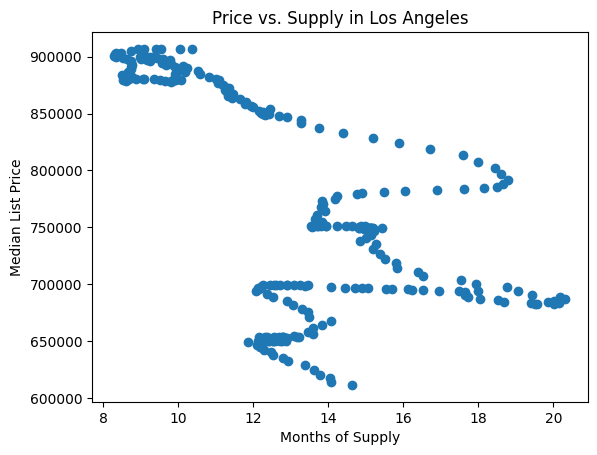

In [55]:
fig, ax = plt.subplots()

ax.scatter(
    la_housing["months_of_supply"],
    la_housing["median_active_list_price"]
)

ax.set_title("Price vs. Supply in Los Angeles")
ax.set_xlabel("Months of Supply")
ax.set_ylabel("Median List Price")

Text(0, 0.5, 'Median List Price')

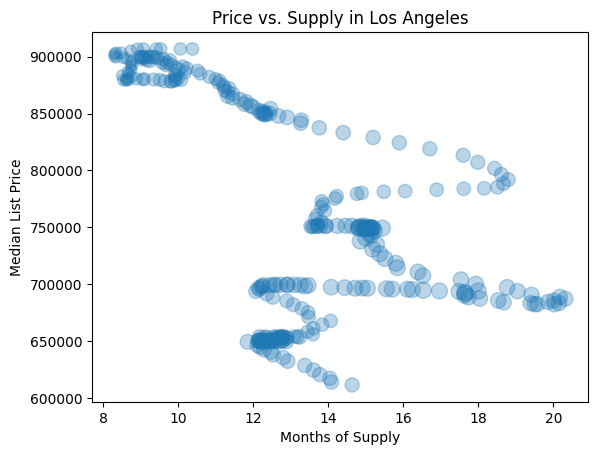

In [56]:
fig, ax = plt.subplots()

ax.scatter(
    x=la_housing["months_of_supply"], 
    y=la_housing["median_active_list_price"], 
    s = (la_housing["inventory"] / 150),
    alpha=.3
)

ax.set_title("Price vs. Supply in Los Angeles")
ax.set_xlabel("Months of Supply")
ax.set_ylabel("Median List Price")

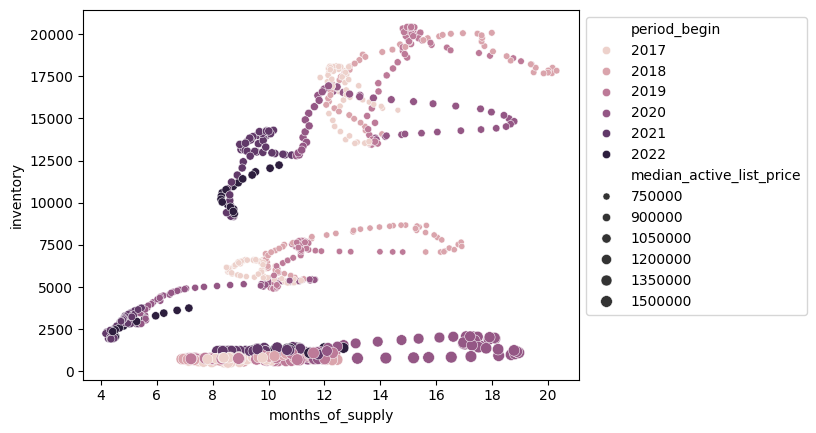

In [58]:
import seaborn as sns

sns.scatterplot(
    x="months_of_supply",
    y="inventory",
    size="median_active_list_price",
    data=ca_housing,
    hue=ca_housing["period_begin"].dt.year).legend(bbox_to_anchor=(1, 1)
)

# Histogram

In [59]:
price_by_region = (
    housing_raw
    .groupby(["region_name"])
    .agg({"median_active_list_price": "mean"})
    .loc[lambda x: x["median_active_list_price"] < 1000000]
)

In [60]:
price_by_region.head()

,median_active_list_price
region_name,
"Abbeville County, SC",202810.692446
"Acadia Parish, LA",142610.532734
"Ada County, ID",427642.983453
"Adair County, IA",116280.052878
"Adair County, MO",134243.535612


Text(0.5, 0, 'Price (Millions)')

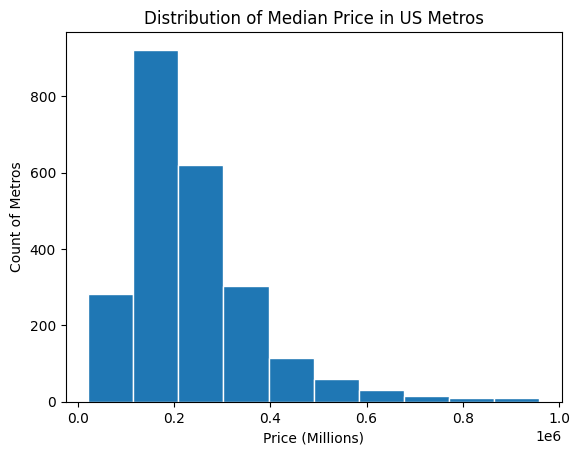

In [61]:
fig, ax = plt.subplots()

ax.hist(
    price_by_region["median_active_list_price"],
    edgecolor='white'
)

ax.set_title("Distribution of Median Price in US Metros")
ax.set_ylabel("Count of Metros")
ax.set_xlabel("Price (Millions)")

(0.0, 1000000.0)

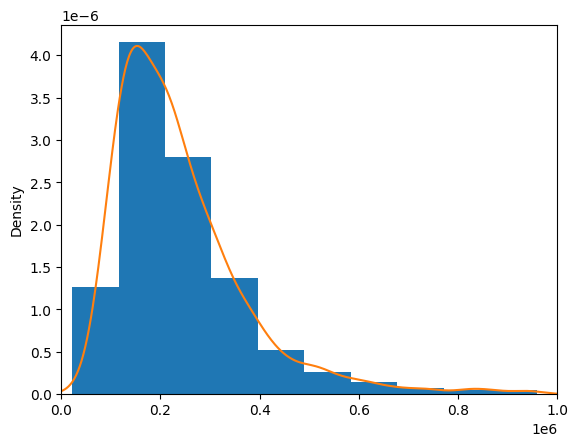

In [63]:
fig, ax = plt.subplots()

ax.hist(
    price_by_region.loc[price_by_region["median_active_list_price"] < 1000000], 
    bins=10, 
    density=True
)

# use pandas plot to add a kde curve
price_by_region.loc[price_by_region["median_active_list_price"] < 1000000, "median_active_list_price"].plot.kde(ax=ax)

plt.xlim([0, 1000000])

In [64]:
ca_housing_markets.head()

region_name,Los Angeles,San Diego,San Francisco
period_begin,,,
2017-03-31,630556.884615,637701.207692,1.263499e+06
2017-06-30,650076.576923,652194.530769,1.259083e+06
2017-09-30,651898.046154,646278.800000,1.276378e+06
2017-12-31,655576.253846,645082.330769,1.300292e+06
2018-03-31,686359.753846,660419.723077,1.333339e+06


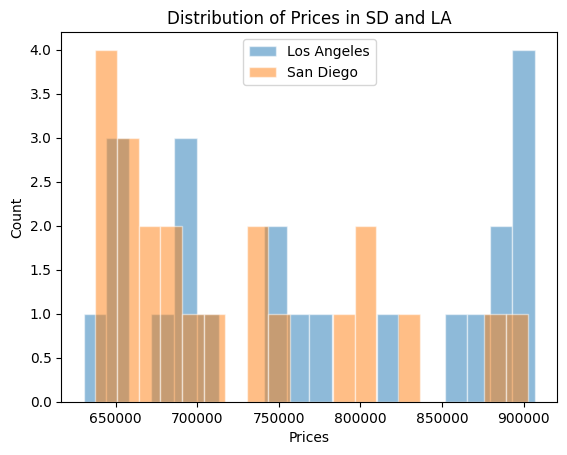

In [65]:
fig, ax = plt.subplots()

ax.hist(
    ca_housing_markets["Los Angeles"],
    alpha=.5,
    bins=20,
    edgecolor='white'
)
ax.hist(
    ca_housing_markets["San Diego"], 
    alpha=.5,
    bins=20,
    edgecolor='white'
)

ax.set_title("Distribution of Prices in SD and LA")
ax.set_xlabel("Prices")
ax.set_ylabel("Count")

ax.legend(ca_housing_markets.columns)